# Finding $P_{eff}$ by least squares fitting:

The best fit is P_eff = 0.83
R^2 is = 0.9593


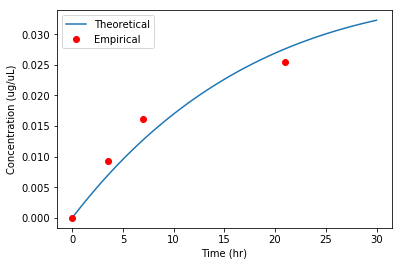

In [98]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#ENTRY VALUES:
x = np.array([0,3.5,7,21])                         #time-points
y = np.array([0,0.00931392,0.01608768,0.0254016])  #concentration in tumor
Kd = 24.57                                         #plasma elimination time constant
Co = 0.26                                          #initial plasma concentration (ug/uL)
    
def tumor_conc (a,b):   #function to calculate nanoparticle ceoncentration in tumor
    Sv = 0.01 #vessel density 1/100um
    A = (Co*a*Sv*Kd)/(1-a*Sv*Kd)
    Ct = A*(np.exp(-a*Sv*b)-np.exp(-b/Kd))
    return Ct

def Rsquared(q):    #function for coefficient of determination R^2
    ysum = fsum = fysum = y2sum = f2sum = 0
    for i in range (0,q):
        ysum += y[i]
        fsum += tumor_conc(P,x[i])
        fysum += y[i]*tumor_conc(P,x[i])
        y2sum += (y[i])**2
        f2sum += (tumor_conc(P,x[i]))**2  
    numer = q*fysum-ysum*fsum
    denom = np.sqrt((q*y2sum-(ysum)**2)*(q*f2sum-(fsum)**2))
    R2 = (numer/denom)**2
    return R2

val = 1 #for comparing sum of R2 in 'if statement' below

for i in range (0,200): #loop for trying various values of P_eff
    P = i/100
    count = 0
    for j in range(0,4):    #loop for calculating tumor conc at the 4 time-points, and finding sum of squares
        ft = tumor_conc(P,x[j])
        square = (y[j]-ft)**2 #residuals squared
        count += square       #sums squares over the 4 time points
    #print(P,count)
  
    #Finds P with the least squares
    if val > count:      #if the current sum of squares is smaller than previous attempt, keep going
        val = count
    else:       
        P -= (1/100)     #the last P is the best value
        print('The best fit is P_eff =',P)
        print('R^2 is = {:.4}'.format(Rsquared(len(x))))
      
    #make a plot with this P
        t = np.linspace(0,30,100)
        ft = tumor_conc(P,t)
        plt.plot(t,ft)
        plt.plot(x,y,'ro')
        plt.xlabel('Time (hr)')
        plt.ylabel('Concentration (ug/uL)')
        plt.legend(['Theoretical','Empirical'],loc='best')
      
    #stop loop from trying any other P values
        break
    

# Getting $K_d$ value from half-life ($t_{1/2}$):

In [7]:
import numpy as np

traw = input('Enter half life (hours): ')
thalf = eval(traw)
kd = 1/(-np.log(0.5)/thalf)
print ('Kd value =  {:.3f}'.format(kd))

Enter half life (hours): 27
Kd value =  38.953


## Additional Information 
Built-in fitting and statistics functions available from Github:
https://lmfit.github.io/lmfit-py/model.html

In [ ]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt

from lmfit import Model

data = loadtxt('model1d_gauss.dat')
x = data[:, 0]
y = data[:, 1]


def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))


gmodel = Model(gaussian)
result = gmodel.fit(y, x=x, amp=5, cen=5, wid=1)

print(result.fit_report())

plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()
# <end examples/doc_model_gaussian.py>